# Testing REST API with for Robot Framework

RESTinstance library makes it easy to test and interact with JSON REST API web services.

## Settings

Let's start learning it by importing the library and configuring it to test our example service: a Plone CMS demo site hosted at http://plonedemo.kitconcept.com:

In [1]:
*** Settings ***

Library  REST  http://plonedemo.kitconcept.com

Because Plone requires explicit ``Accept: application/json`` header to route reuqest to its REST API, we define user keyword **Set default headers** as **Suite Setup** to set that header for REST library calls:

In [2]:
*** Settings ***

Library  BuiltIn

Suite Setup  Set default headers

*** Keywords ***

Set default headers
    ${headers}=  Create dictionary
    ...  Accept=application/json
    Set headers  ${headers}

Now we are ready to start calling the REST library by:
* executing a HTTP verb to some absolute path with optional payload
* making test assertions on the response
* logging or returning output from the response

## GET

This first test should PASS, because English language path should return ``en`` as its language:

In [3]:
*** Test Cases ***

GET English portal root
    GET  /en
    String  response body language  en
    Output  response body language

<a href="javascript:(function(){var w=window.open();w.document.open();w.document.write(window.atob('PCFET0NUWVBFIGh0bWw+CjxodG1sPgo8aGVhZD4KPG1ldGEgaHR0cC1lcXVpdj0iQ29udGVudC1UeXBlIiBjb250ZW50PSJ0ZXh0L2h0bWw7IGNoYXJzZXQ9dXRmLTgiPgo8bWV0YSBodHRwLWVxdWl2PSJQcmFnbWEiIGNvbnRlbnQ9Im5vLWNhY2hlIj4KPG1ldGEgaHR0cC1lcXVpdj0iRXhwaXJlcyIgY29udGVudD0iLTEiPgo8bWV0YSBodHRwLWVxdWl2PSJYLVVBLUNvbXBhdGlibGUiIGNvbnRlbnQ9IklFPWVkZ2UiPgo8bWV0YSBjb250ZW50PSJSb2JvdCBGcmFtZXdvcmsgMy4wLjIgKFB5dGhvbiAzLjYuNCBvbiBsaW51eCkiIG5hbWU9IkdlbmVyYXRvciI+CjxsaW5rIHJlbD0iaWNvbiIgdHlwZT0iaW1hZ2UveC1pY29uIiBocmVmPSJkYXRhOmltYWdlL3gtaWNvbjtiYXNlNjQsQUFBQkFBRUFFQkFRQUFFQUJBQW9BUUFBRmdBQUFDZ0FBQUFRQUFBQUlBQUFBQUVBQkFBQUFBQUFBQUlBQUFBQUFBQUFBQUFBRUFBQUFBQUFBQUFBQUFBQUpFQm9BQ3RuZmdBNWNZWUFFUnNpQUV4MmxBQWJLa1FBY2F6QkFDWkNWd0FjTTFjQUswdWNBQU1EQlFBblFuY0FTRytGQUJrb1ZRQXlXbWdBNmY4U2d2SC9Jajk5K0dMeUlpbnlKZm4vWWkvL0tTTHpVeTlpWm9ncElsZDMvNEpWVlRraWQ3dnlVak5WTlZKRUFHT1o2WjdwWHdBQUJwbVprUmlMQUFBR2lKWnBtR0FBQUVFdDNTWGR4QUFBVEM3by91M0VBQUM4TVJacGphc0FBQVkxVlZWVFlBQUFCS3FxcXFwQUFBQUFES3FxNEFBQUFBQUF2NHNBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFNQURBQURnQXdBQTRBY0FBT0FIQUFEZ0J3QUF3QWNBQU9BSEFBRGdEd0FBOEE4QUFQZy9BQUQrZndBQSI+CjxzdHlsZSBtZWRpYT0iYWxsIiB0eXBlPSJ0ZXh0L2NzcyI+Ci8qIEdlbmVyaWMgYW5kIG1pc2Mgc3R5bGVzICovCmJvZHkgewogICAgZm9udC1mYW1pbHk6IEhlbHZldGljYSwgc2Fucy1zZXJpZjsKICAgIGZvbnQtc2l6ZTogMC44ZW07CiAgICBjb2xvcjogYmxhY2s7CiAgICBwYWRkaW5nOiA2cHg7CiAgICBiYWNrZ3JvdW5kOiB3aGl0ZTsKfQp0YWJsZSB7CiAgICB0YWJsZS1sYXlvdXQ6IGZpeGVkOwogICAgd29yZC13cmFwOiBicmVhay13b3JkOwogICAgZW1wdHktY2VsbHM6IHNob3c7CiAgICBmb250LXNpemU6IDFlbTsKfQp0aCwgdGQgewogICAgdmVydGljYWwtYWxpZ246IHRvcDsKfQpiciB7CiAgICBtc28tZGF0YS1wbGFjZW1lbnQ6IHNhbWUtY2VsbDsgLyogbWFpbnRhaW4gbGluZSBicmVha3MgaW4gRXhjZWwgKi8KfQphLCBhOmxpbmssIGE6dmlzaXRlZCB7CiAgICB0ZXh0LWRlY29yYXRpb246IG5vbmU7CiAgICBjb2xvcjogIzE1YzsKfQphID4gaW1nIHsKICAgIGJvcmRlcjogMXB4IHNvbGlkICMxNWMgIWltcG9ydGFudDsKfQphOmhvdmVyLCBhOmFjdGl2ZSB7CiAgICB0ZXh0LWRlY29yYXRpb246IHVuZGVybGluZTsKICAgIGNvbG9yOiAjNjFjOwp9Ci5wYXJlbnQtbmFtZSB7CiAgICBmb250LXNpemU6IDAuN2VtOwogICAgbGV0dGVyLXNwYWNpbmc6IC0wLjA3ZW07Cn0KLm1lc3NhZ2UgewogICAgd2hpdGUtc3BhY2U6IHByZS13cmFwOwp9Ci8qIEhlYWRlcnMgKi8KI2hlYWRlciB7CiAgICB3aWR0aDogNjVlbTsKICAgIGhlaWdodDogM2VtOwogICAgbWFyZ2luOiA2cHggMDsKfQpoMSB7CiAgICBmbG9hdDogbGVmdDsKICAgIG1hcmdpbjogMCAwIDAuNWVtIDA7CiAgICB3aWR0aDogNzUlOwp9CmgyIHsKICAgIGNsZWFyOiBsZWZ0Owp9CiNnZW5lcmF0ZWQgewogICAgZmxvYXQ6IHJpZ2h0OwogICAgdGV4dC1hbGlnbjogcmlnaHQ7CiAgICBmb250LXNpemU6IDAuOWVtOwogICAgd2hpdGUtc3BhY2U6IG5vd3JhcDsKfQovKiBEb2N1bWVudGF0aW9uIGhlYWRlcnMgKi8KLmRvYyA+IGgyIHsKICAgIGZvbnQtc2l6ZTogMS4yZW07Cn0KLmRvYyA+IGgzIHsKICAgIGZvbnQtc2l6ZTogMS4xZW07Cn0KLmRvYyA+IGg0IHsKICAgIGZvbnQtc2l6ZTogMS4wZW07Cn0KLyogU3RhdHVzIHRleHQgY29sb3JzIC0tICFpbXBvcnRhbnQgYWxsb3dzIHVzaW5nIHRoZW0gaW4gbGlua3MgKi8KLmZhaWwgewogICAgY29sb3I6ICNmMzMgIWltcG9ydGFudDsKICAgIGZvbnQtd2VpZ2h0OiBib2xkOwp9Ci5wYXNzIHsKICAgIGNvbG9yOiAjMzkzICFpbXBvcnRhbnQ7Cn0KLmxhYmVsIHsKICAgIHBhZGRpbmc6IDJweCA1cHg7CiAgICBmb250LXNpemU6IDAuNzVlbTsKICAgIGxldHRlci1zcGFjaW5nOiAxcHg7CiAgICB3aGl0ZS1zcGFjZTogbm93cmFwOwogICAgY29sb3I6IGJsYWNrOwogICAgYmFja2dyb3VuZC1jb2xvcjogI2RkZDsKICAgIGJvcmRlci1yYWRpdXM6IDNweDsKfQoubGFiZWwuZGVidWcsIC5sYWJlbC50cmFjZSwgLmxhYmVsLmVycm9yLCAubGFiZWwua2V5d29yZCB7CiAgICBsZXR0ZXItc3BhY2luZzogMDsKfQoubGFiZWwuZXJyb3IsIC5sYWJlbC5mYWlsLCAubGFiZWwucGFzcywgLmxhYmVsLndhcm4gewogICAgY29sb3I6ICNmZmYgIWltcG9ydGFudDsKICAgIGZvbnQtd2VpZ2h0OiBib2xkOwp9Ci5sYWJlbC5lcnJvciwgLmxhYmVsLmZhaWwgewogICAgYmFja2dyb3VuZC1jb2xvcjogI2Q5NTM0ZjsKfQoubGFiZWwucGFzcyB7CiAgICBiYWNrZ3JvdW5kLWNvbG9yOiAjNWNiODVjOwp9Ci5sYWJlbC53YXJuIHsKICAgIGJhY2tncm91bmQtY29sb3I6ICNlYzk3MWY7Cn0KLyogVG9wIHJpZ2h0IGhlYWRlciAqLwojdG9wLXJpZ2h0LWhlYWRlciB7CiAgICBwb3NpdGlvbjogZml4ZWQ7CiAgICB0b3A6IDA7CiAgICByaWdodDogMDsKICAgIHotaW5kZXg6IDEwMDA7CiAgICB3aWR0aDogMTJlbTsKICAgIHRleHQtYWxpZ246IGNlbnRlcjsKfQojcmVwb3J0LW9yLWxvZy1saW5rIGEgewogICAgZGlzcGxheTogYmxvY2s7CiAgICBiYWNrZ3JvdW5kOiBibGFjazsKICAgIGNvbG9yOiB3aGl0ZTsKICAgIHRleHQtZGVjb3JhdGlvbjogbm9uZTsKICAgIGZvbnQtd2VpZ2h0OiBib2xkOwogICAgbGV0dGVyLXNwYWNp

"en"

This second test should FAIL, because German language path should return ``de`` as its language, not ``en``:

In [4]:
*** Test Cases ***

GET portal root
    GET  /de
    String  response body language  en

<a href="javascript:(function(){var w=window.open();w.document.open();w.document.write(window.atob('PCFET0NUWVBFIGh0bWw+CjxodG1sPgo8aGVhZD4KPG1ldGEgaHR0cC1lcXVpdj0iQ29udGVudC1UeXBlIiBjb250ZW50PSJ0ZXh0L2h0bWw7IGNoYXJzZXQ9dXRmLTgiPgo8bWV0YSBodHRwLWVxdWl2PSJQcmFnbWEiIGNvbnRlbnQ9Im5vLWNhY2hlIj4KPG1ldGEgaHR0cC1lcXVpdj0iRXhwaXJlcyIgY29udGVudD0iLTEiPgo8bWV0YSBodHRwLWVxdWl2PSJYLVVBLUNvbXBhdGlibGUiIGNvbnRlbnQ9IklFPWVkZ2UiPgo8bWV0YSBjb250ZW50PSJSb2JvdCBGcmFtZXdvcmsgMy4wLjIgKFB5dGhvbiAzLjYuNCBvbiBsaW51eCkiIG5hbWU9IkdlbmVyYXRvciI+CjxsaW5rIHJlbD0iaWNvbiIgdHlwZT0iaW1hZ2UveC1pY29uIiBocmVmPSJkYXRhOmltYWdlL3gtaWNvbjtiYXNlNjQsQUFBQkFBRUFFQkFRQUFFQUJBQW9BUUFBRmdBQUFDZ0FBQUFRQUFBQUlBQUFBQUVBQkFBQUFBQUFBQUlBQUFBQUFBQUFBQUFBRUFBQUFBQUFBQUFBQUFBQUpFQm9BQ3RuZmdBNWNZWUFFUnNpQUV4MmxBQWJLa1FBY2F6QkFDWkNWd0FjTTFjQUswdWNBQU1EQlFBblFuY0FTRytGQUJrb1ZRQXlXbWdBNmY4U2d2SC9Jajk5K0dMeUlpbnlKZm4vWWkvL0tTTHpVeTlpWm9ncElsZDMvNEpWVlRraWQ3dnlVak5WTlZKRUFHT1o2WjdwWHdBQUJwbVprUmlMQUFBR2lKWnBtR0FBQUVFdDNTWGR4QUFBVEM3by91M0VBQUM4TVJacGphc0FBQVkxVlZWVFlBQUFCS3FxcXFwQUFBQUFES3FxNEFBQUFBQUF2NHNBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFNQURBQURnQXdBQTRBY0FBT0FIQUFEZ0J3QUF3QWNBQU9BSEFBRGdEd0FBOEE4QUFQZy9BQUQrZndBQSI+CjxzdHlsZSBtZWRpYT0iYWxsIiB0eXBlPSJ0ZXh0L2NzcyI+Ci8qIEdlbmVyaWMgYW5kIG1pc2Mgc3R5bGVzICovCmJvZHkgewogICAgZm9udC1mYW1pbHk6IEhlbHZldGljYSwgc2Fucy1zZXJpZjsKICAgIGZvbnQtc2l6ZTogMC44ZW07CiAgICBjb2xvcjogYmxhY2s7CiAgICBwYWRkaW5nOiA2cHg7CiAgICBiYWNrZ3JvdW5kOiB3aGl0ZTsKfQp0YWJsZSB7CiAgICB0YWJsZS1sYXlvdXQ6IGZpeGVkOwogICAgd29yZC13cmFwOiBicmVhay13b3JkOwogICAgZW1wdHktY2VsbHM6IHNob3c7CiAgICBmb250LXNpemU6IDFlbTsKfQp0aCwgdGQgewogICAgdmVydGljYWwtYWxpZ246IHRvcDsKfQpiciB7CiAgICBtc28tZGF0YS1wbGFjZW1lbnQ6IHNhbWUtY2VsbDsgLyogbWFpbnRhaW4gbGluZSBicmVha3MgaW4gRXhjZWwgKi8KfQphLCBhOmxpbmssIGE6dmlzaXRlZCB7CiAgICB0ZXh0LWRlY29yYXRpb246IG5vbmU7CiAgICBjb2xvcjogIzE1YzsKfQphID4gaW1nIHsKICAgIGJvcmRlcjogMXB4IHNvbGlkICMxNWMgIWltcG9ydGFudDsKfQphOmhvdmVyLCBhOmFjdGl2ZSB7CiAgICB0ZXh0LWRlY29yYXRpb246IHVuZGVybGluZTsKICAgIGNvbG9yOiAjNjFjOwp9Ci5wYXJlbnQtbmFtZSB7CiAgICBmb250LXNpemU6IDAuN2VtOwogICAgbGV0dGVyLXNwYWNpbmc6IC0wLjA3ZW07Cn0KLm1lc3NhZ2UgewogICAgd2hpdGUtc3BhY2U6IHByZS13cmFwOwp9Ci8qIEhlYWRlcnMgKi8KI2hlYWRlciB7CiAgICB3aWR0aDogNjVlbTsKICAgIGhlaWdodDogM2VtOwogICAgbWFyZ2luOiA2cHggMDsKfQpoMSB7CiAgICBmbG9hdDogbGVmdDsKICAgIG1hcmdpbjogMCAwIDAuNWVtIDA7CiAgICB3aWR0aDogNzUlOwp9CmgyIHsKICAgIGNsZWFyOiBsZWZ0Owp9CiNnZW5lcmF0ZWQgewogICAgZmxvYXQ6IHJpZ2h0OwogICAgdGV4dC1hbGlnbjogcmlnaHQ7CiAgICBmb250LXNpemU6IDAuOWVtOwogICAgd2hpdGUtc3BhY2U6IG5vd3JhcDsKfQovKiBEb2N1bWVudGF0aW9uIGhlYWRlcnMgKi8KLmRvYyA+IGgyIHsKICAgIGZvbnQtc2l6ZTogMS4yZW07Cn0KLmRvYyA+IGgzIHsKICAgIGZvbnQtc2l6ZTogMS4xZW07Cn0KLmRvYyA+IGg0IHsKICAgIGZvbnQtc2l6ZTogMS4wZW07Cn0KLyogU3RhdHVzIHRleHQgY29sb3JzIC0tICFpbXBvcnRhbnQgYWxsb3dzIHVzaW5nIHRoZW0gaW4gbGlua3MgKi8KLmZhaWwgewogICAgY29sb3I6ICNmMzMgIWltcG9ydGFudDsKICAgIGZvbnQtd2VpZ2h0OiBib2xkOwp9Ci5wYXNzIHsKICAgIGNvbG9yOiAjMzkzICFpbXBvcnRhbnQ7Cn0KLmxhYmVsIHsKICAgIHBhZGRpbmc6IDJweCA1cHg7CiAgICBmb250LXNpemU6IDAuNzVlbTsKICAgIGxldHRlci1zcGFjaW5nOiAxcHg7CiAgICB3aGl0ZS1zcGFjZTogbm93cmFwOwogICAgY29sb3I6IGJsYWNrOwogICAgYmFja2dyb3VuZC1jb2xvcjogI2RkZDsKICAgIGJvcmRlci1yYWRpdXM6IDNweDsKfQoubGFiZWwuZGVidWcsIC5sYWJlbC50cmFjZSwgLmxhYmVsLmVycm9yLCAubGFiZWwua2V5d29yZCB7CiAgICBsZXR0ZXItc3BhY2luZzogMDsKfQoubGFiZWwuZXJyb3IsIC5sYWJlbC5mYWlsLCAubGFiZWwucGFzcywgLmxhYmVsLndhcm4gewogICAgY29sb3I6ICNmZmYgIWltcG9ydGFudDsKICAgIGZvbnQtd2VpZ2h0OiBib2xkOwp9Ci5sYWJlbC5lcnJvciwgLmxhYmVsLmZhaWwgewogICAgYmFja2dyb3VuZC1jb2xvcjogI2Q5NTM0ZjsKfQoubGFiZWwucGFzcyB7CiAgICBiYWNrZ3JvdW5kLWNvbG9yOiAjNWNiODVjOwp9Ci5sYWJlbC53YXJuIHsKICAgIGJhY2tncm91bmQtY29sb3I6ICNlYzk3MWY7Cn0KLyogVG9wIHJpZ2h0IGhlYWRlciAqLwojdG9wLXJpZ2h0LWhlYWRlciB7CiAgICBwb3NpdGlvbjogZml4ZWQ7CiAgICB0b3A6IDA7CiAgICByaWdodDogMDsKICAgIHotaW5kZXg6IDEwMDA7CiAgICB3aWR0aDogMTJlbTsKICAgIHRleHQtYWxpZ246IGNlbnRlcjsKfQojcmVwb3J0LW9yLWxvZy1saW5rIGEgewogICAgZGlzcGxheTogYmxvY2s7CiAgICBiYWNrZ3JvdW5kOiBibGFjazsKICAgIGNvbG9yOiB3aGl0ZTsKICAgIHRleHQtZGVjb3JhdGlvbjogbm9uZTsKICAgIGZvbnQtd2VpZ2h0OiBib2xkOwogICAgbGV0dGVyLXNwYWNp

Jupyter                                                                       
GET portal root                                                       | FAIL |
'de' is not one of ['en']

Failed validating 'enum' in schema:
    {'enum': ['en'], 'example': 'de', 'type': 'string'}

On instance:
    'de'
------------------------------------------------------------------------------
Jupyter                                                               | FAIL |
1 critical test, 0 passed, 1 failed
1 test total, 0 passed, 1 failed
Output:  /run/user/1000/tmp5cpo3aoa/output.xml


## POST

Calling mutable API at ``plonedemo.kitconcept.com`` requires authentication with the service.

To allow REST library to test authenticated methods, we need to login to the service.

Here we define a new user keyword to use SeleniumLibrary to login and retrieve a valid session cookie:

In [5]:
*** Settings ***

Library  SeleniumLibrary
Suite teardown  Close all browsers

*** Variables ***

${API}  http://plonedemo.kitconcept.com

*** Keywords ***

Get auth token
    Open browser  ${API}/en/login  browser=headlessfirefox
    Page should contain  Login as Editor
    Click link  Login as Editor
    Page should contain  You are now logged in
    ${cookie}=  Get cookie  __ac
    [return]  ${cookie.value}

Next we can redefine our **Suite Setup** to also set the session cookie for REST library request headers:

In [6]:
*** Settings ***

Library  BuiltIn

Suite setup  Set default headers

*** Keywords ***

Set default headers
    ${token}=  Get auth token
    ${headers}=  Create dictionary
    ...  Accept=application/json
    ...  Cookie=__ac=${token}
    Set headers  ${headers}

And finally, as we are now logged in, we can start testing the creation of new pages on Plone:

<a href="javascript:(function(){var w=window.open();w.document.open();w.document.write(window.atob('PCFET0NUWVBFIGh0bWw+CjxodG1sPgo8aGVhZD4KPG1ldGEgaHR0cC1lcXVpdj0iQ29udGVudC1UeXBlIiBjb250ZW50PSJ0ZXh0L2h0bWw7IGNoYXJzZXQ9dXRmLTgiPgo8bWV0YSBodHRwLWVxdWl2PSJQcmFnbWEiIGNvbnRlbnQ9Im5vLWNhY2hlIj4KPG1ldGEgaHR0cC1lcXVpdj0iRXhwaXJlcyIgY29udGVudD0iLTEiPgo8bWV0YSBodHRwLWVxdWl2PSJYLVVBLUNvbXBhdGlibGUiIGNvbnRlbnQ9IklFPWVkZ2UiPgo8bWV0YSBjb250ZW50PSJSb2JvdCBGcmFtZXdvcmsgMy4wLjIgKFB5dGhvbiAzLjYuNCBvbiBsaW51eCkiIG5hbWU9IkdlbmVyYXRvciI+CjxsaW5rIHJlbD0iaWNvbiIgdHlwZT0iaW1hZ2UveC1pY29uIiBocmVmPSJkYXRhOmltYWdlL3gtaWNvbjtiYXNlNjQsQUFBQkFBRUFFQkFRQUFFQUJBQW9BUUFBRmdBQUFDZ0FBQUFRQUFBQUlBQUFBQUVBQkFBQUFBQUFBQUlBQUFBQUFBQUFBQUFBRUFBQUFBQUFBQUFBQUFBQUpFQm9BQ3RuZmdBNWNZWUFFUnNpQUV4MmxBQWJLa1FBY2F6QkFDWkNWd0FjTTFjQUswdWNBQU1EQlFBblFuY0FTRytGQUJrb1ZRQXlXbWdBNmY4U2d2SC9Jajk5K0dMeUlpbnlKZm4vWWkvL0tTTHpVeTlpWm9ncElsZDMvNEpWVlRraWQ3dnlVak5WTlZKRUFHT1o2WjdwWHdBQUJwbVprUmlMQUFBR2lKWnBtR0FBQUVFdDNTWGR4QUFBVEM3by91M0VBQUM4TVJacGphc0FBQVkxVlZWVFlBQUFCS3FxcXFwQUFBQUFES3FxNEFBQUFBQUF2NHNBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFNQURBQURnQXdBQTRBY0FBT0FIQUFEZ0J3QUF3QWNBQU9BSEFBRGdEd0FBOEE4QUFQZy9BQUQrZndBQSI+CjxzdHlsZSBtZWRpYT0iYWxsIiB0eXBlPSJ0ZXh0L2NzcyI+Ci8qIEdlbmVyaWMgYW5kIG1pc2Mgc3R5bGVzICovCmJvZHkgewogICAgZm9udC1mYW1pbHk6IEhlbHZldGljYSwgc2Fucy1zZXJpZjsKICAgIGZvbnQtc2l6ZTogMC44ZW07CiAgICBjb2xvcjogYmxhY2s7CiAgICBwYWRkaW5nOiA2cHg7CiAgICBiYWNrZ3JvdW5kOiB3aGl0ZTsKfQp0YWJsZSB7CiAgICB0YWJsZS1sYXlvdXQ6IGZpeGVkOwogICAgd29yZC13cmFwOiBicmVhay13b3JkOwogICAgZW1wdHktY2VsbHM6IHNob3c7CiAgICBmb250LXNpemU6IDFlbTsKfQp0aCwgdGQgewogICAgdmVydGljYWwtYWxpZ246IHRvcDsKfQpiciB7CiAgICBtc28tZGF0YS1wbGFjZW1lbnQ6IHNhbWUtY2VsbDsgLyogbWFpbnRhaW4gbGluZSBicmVha3MgaW4gRXhjZWwgKi8KfQphLCBhOmxpbmssIGE6dmlzaXRlZCB7CiAgICB0ZXh0LWRlY29yYXRpb246IG5vbmU7CiAgICBjb2xvcjogIzE1YzsKfQphID4gaW1nIHsKICAgIGJvcmRlcjogMXB4IHNvbGlkICMxNWMgIWltcG9ydGFudDsKfQphOmhvdmVyLCBhOmFjdGl2ZSB7CiAgICB0ZXh0LWRlY29yYXRpb246IHVuZGVybGluZTsKICAgIGNvbG9yOiAjNjFjOwp9Ci5wYXJlbnQtbmFtZSB7CiAgICBmb250LXNpemU6IDAuN2VtOwogICAgbGV0dGVyLXNwYWNpbmc6IC0wLjA3ZW07Cn0KLm1lc3NhZ2UgewogICAgd2hpdGUtc3BhY2U6IHByZS13cmFwOwp9Ci8qIEhlYWRlcnMgKi8KI2hlYWRlciB7CiAgICB3aWR0aDogNjVlbTsKICAgIGhlaWdodDogM2VtOwogICAgbWFyZ2luOiA2cHggMDsKfQpoMSB7CiAgICBmbG9hdDogbGVmdDsKICAgIG1hcmdpbjogMCAwIDAuNWVtIDA7CiAgICB3aWR0aDogNzUlOwp9CmgyIHsKICAgIGNsZWFyOiBsZWZ0Owp9CiNnZW5lcmF0ZWQgewogICAgZmxvYXQ6IHJpZ2h0OwogICAgdGV4dC1hbGlnbjogcmlnaHQ7CiAgICBmb250LXNpemU6IDAuOWVtOwogICAgd2hpdGUtc3BhY2U6IG5vd3JhcDsKfQovKiBEb2N1bWVudGF0aW9uIGhlYWRlcnMgKi8KLmRvYyA+IGgyIHsKICAgIGZvbnQtc2l6ZTogMS4yZW07Cn0KLmRvYyA+IGgzIHsKICAgIGZvbnQtc2l6ZTogMS4xZW07Cn0KLmRvYyA+IGg0IHsKICAgIGZvbnQtc2l6ZTogMS4wZW07Cn0KLyogU3RhdHVzIHRleHQgY29sb3JzIC0tICFpbXBvcnRhbnQgYWxsb3dzIHVzaW5nIHRoZW0gaW4gbGlua3MgKi8KLmZhaWwgewogICAgY29sb3I6ICNmMzMgIWltcG9ydGFudDsKICAgIGZvbnQtd2VpZ2h0OiBib2xkOwp9Ci5wYXNzIHsKICAgIGNvbG9yOiAjMzkzICFpbXBvcnRhbnQ7Cn0KLmxhYmVsIHsKICAgIHBhZGRpbmc6IDJweCA1cHg7CiAgICBmb250LXNpemU6IDAuNzVlbTsKICAgIGxldHRlci1zcGFjaW5nOiAxcHg7CiAgICB3aGl0ZS1zcGFjZTogbm93cmFwOwogICAgY29sb3I6IGJsYWNrOwogICAgYmFja2dyb3VuZC1jb2xvcjogI2RkZDsKICAgIGJvcmRlci1yYWRpdXM6IDNweDsKfQoubGFiZWwuZGVidWcsIC5sYWJlbC50cmFjZSwgLmxhYmVsLmVycm9yLCAubGFiZWwua2V5d29yZCB7CiAgICBsZXR0ZXItc3BhY2luZzogMDsKfQoubGFiZWwuZXJyb3IsIC5sYWJlbC5mYWlsLCAubGFiZWwucGFzcywgLmxhYmVsLndhcm4gewogICAgY29sb3I6ICNmZmYgIWltcG9ydGFudDsKICAgIGZvbnQtd2VpZ2h0OiBib2xkOwp9Ci5sYWJlbC5lcnJvciwgLmxhYmVsLmZhaWwgewogICAgYmFja2dyb3VuZC1jb2xvcjogI2Q5NTM0ZjsKfQoubGFiZWwucGFzcyB7CiAgICBiYWNrZ3JvdW5kLWNvbG9yOiAjNWNiODVjOwp9Ci5sYWJlbC53YXJuIHsKICAgIGJhY2tncm91bmQtY29sb3I6ICNlYzk3MWY7Cn0KLyogVG9wIHJpZ2h0IGhlYWRlciAqLwojdG9wLXJpZ2h0LWhlYWRlciB7CiAgICBwb3NpdGlvbjogZml4ZWQ7CiAgICB0b3A6IDA7CiAgICByaWdodDogMDsKICAgIHotaW5kZXg6IDEwMDA7CiAgICB3aWR0aDogMTJlbTsKICAgIHRleHQtYWxpZ246IGNlbnRlcjsKfQojcmVwb3J0LW9yLWxvZy1saW5rIGEgewogICAgZGlzcGxheTogYmxvY2s7CiAgICBiYWNrZ3JvdW5kOiBibGFjazsKICAgIGNvbG9yOiB3aGl0ZTsKICAgIHRleHQtZGVjb3JhdGlvbjogbm9uZTsKICAgIGZvbnQtd2VpZ2h0OiBib2xkOwogICAgbGV0dGVyLXNwYWNp

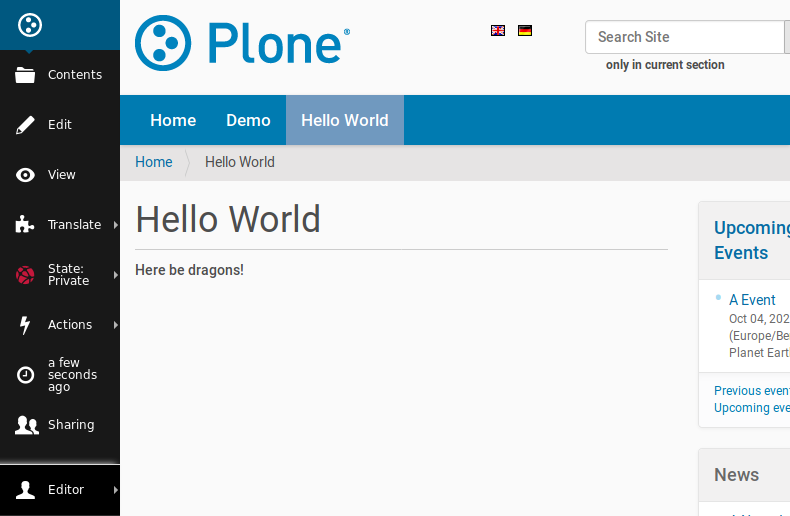

In [7]:
*** Settings ***

Library  String

*** Keywords ***

Create new page
    ${payload}=  Create dictionary
    ...  @type=Document
    ...  title=Hello World
    ...  text=<p>Here be dragons!</p>
    POST  /en  ${payload}
    Integer  response status  201
    ${url}=  Output  response body @id
    ${url}=  Strip string  ${url}  characters="
    [return]  ${url}

*** Test Cases **

Can view the new page
    ${url}=  Create new page
    Go to  ${url}
    Page should contain  Here be dragons!
    Set window size  800  600
    Capture page screenshot